In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline 

In [2]:
df = pd.read_csv('hotel_bookings.csv')

### Data Summary

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118898 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal            

## Data Cleaning 

In [5]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [6]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns, 
                                 'percent_missing ': percent_missing})

In [7]:
missing_value_df

,column_name,percent_missing
hotel,hotel,0.000000
is_canceled,is_canceled,0.000000
lead_time,lead_time,0.000000
arrival_date_year,arrival_date_year,0.000000
arrival_date_month,arrival_date_month,0.000000
arrival_date_week_number,arrival_date_week_number,0.000000
arrival_date_day_of_month,arrival_date_day_of_month,0.000000
stays_in_weekend_nights,stays_in_weekend_nights,0.000000
stays_in_week_nights,stays_in_week_nights,0.000000
adults,adults,0.000000


In [8]:
df.drop(['agent','company'],axis=1 , inplace=True)

In [9]:
df.dropna(axis = 0 , inplace=True)

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [11]:
df.duplicated().sum()

31984

In [12]:
df.drop_duplicates()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [13]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

## Data Visualization

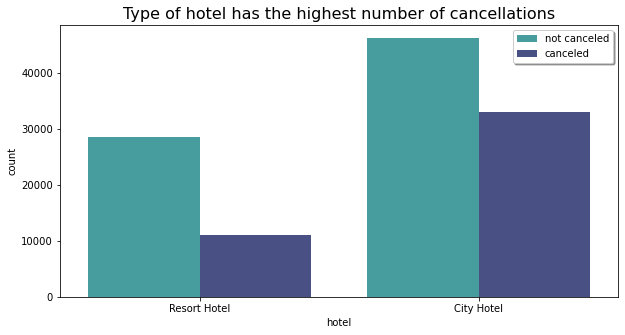

In [14]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'hotel',hue='is_canceled',palette='mako_r')
plt.title("Type of hotel has the highest number of cancellations",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

In [15]:
#Which is the most reserved room type?
df.reserved_room_type.value_counts()

A    85601
D    19173
E     6497
F     2890
G     2083
B     1114
C      931
H      601
L        6
P        2
Name: reserved_room_type, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


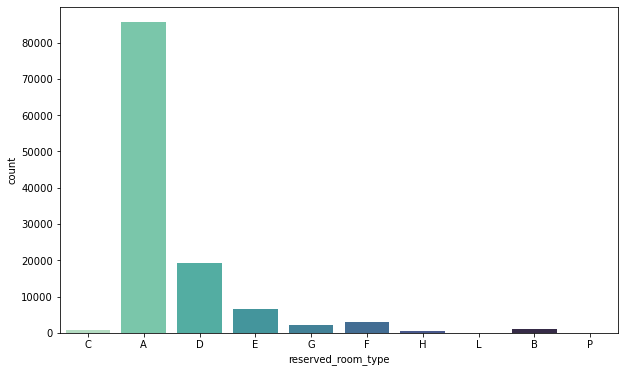

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(df['reserved_room_type'], palette='mako_r')
plt.show()

In [17]:
#What is the most requested meal?
df.meal.value_counts(normalize=True)

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

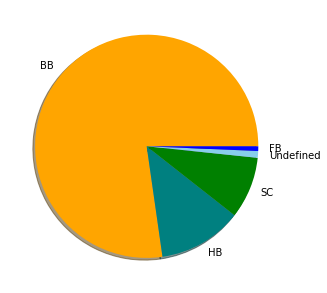

In [18]:
plt.figure(figsize=(5,9))
meal = df['meal'].value_counts()
colors=['orange','teal','green','skyblue','blue']
plt.pie(meal, labels=['BB','HB','SC','Undefined','FB'],
        colors=colors,
        shadow=True,
       
       
        )
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


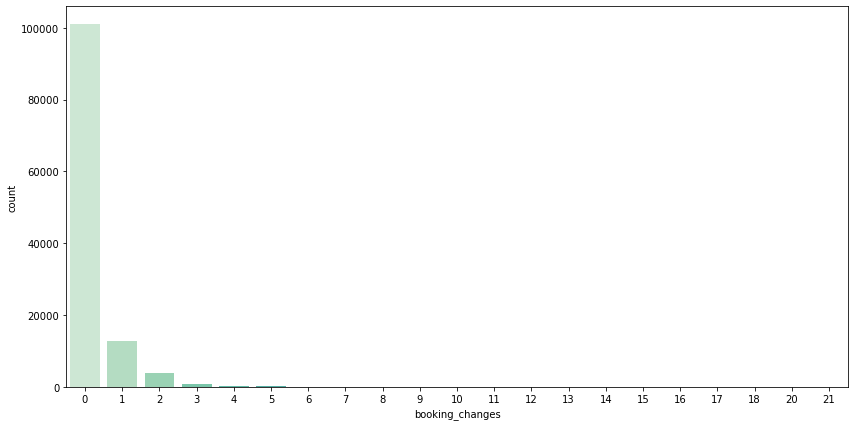

In [19]:
plt.figure(figsize=(14,7))
sns.countplot(df['booking_changes'], palette='mako_r')
plt.show()

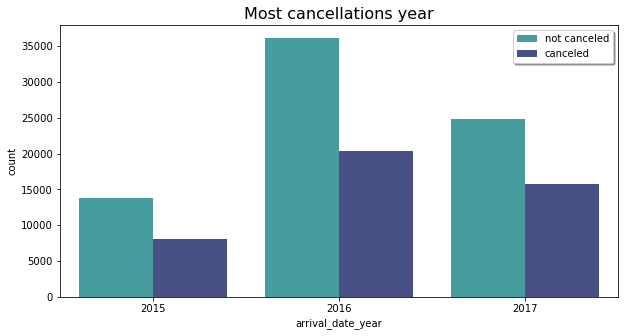

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'arrival_date_year',hue='is_canceled',palette='mako_r')
plt.title("Most cancellations year",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

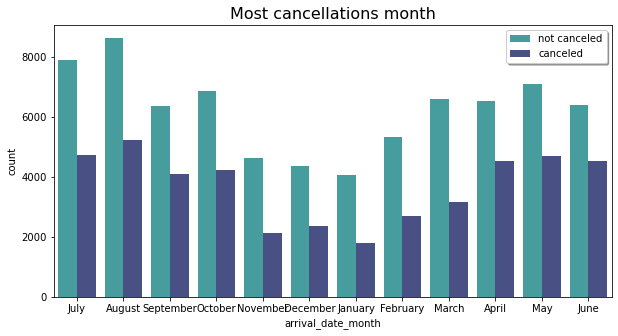

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'arrival_date_month',hue='is_canceled',palette='mako_r')
plt.title("Most cancellations month",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

In [36]:
df.deposit_type.value_counts()

No Deposit    104163
Non Refund     14573
Refundable       162
Name: deposit_type, dtype: int64

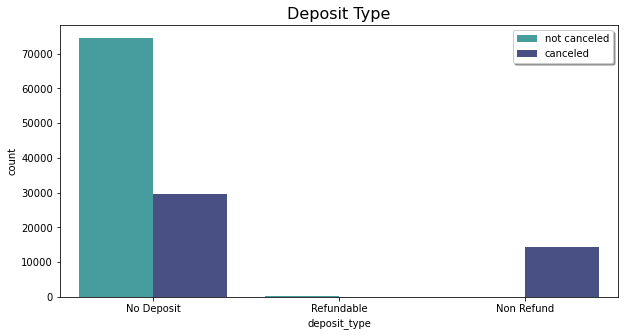

In [53]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'deposit_type',hue='is_canceled',palette='mako_r')
plt.title("Deposit Type",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()

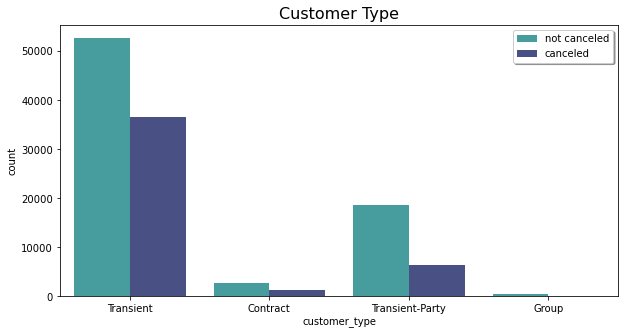

In [56]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x = 'customer_type',hue='is_canceled',palette='mako_r')
plt.title("Customer Type",fontsize=16)
plt.legend(['not canceled','canceled'],shadow = True, loc = 0)
plt.show()